## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
plt.style.use("ggplot")
%matplotlib inline



os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE=[10,25]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i in PATIENCE:
    keras.backend.clear_session()
    earlystop = EarlyStopping(monitor="val_accuracy", patience=i, verbose=1)
    model = build_mlp(x_train.shape[1:])
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
    model.fit(x_train,y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle=True,
              callbacks=[earlystop])
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    es_tag = f"earlystop_{i}"
    results[es_tag] = {"train_loss":train_loss,
                       "valid_loss":valid_loss,
                       "train_acc":train_acc,
                       "valid_acc":valid_acc}

    

Epoch 1/50
49/49 [==============================] - 6s 93ms/step - loss: 1.7692 - accuracy: 0.3837 - val_loss: 2.5260 - val_accuracy: 0.2179
Epoch 2/50
49/49 [==============================] - 4s 77ms/step - loss: 1.4875 - accuracy: 0.4776 - val_loss: 1.9929 - val_accuracy: 0.3030
Epoch 3/50
49/49 [==============================] - 4s 74ms/step - loss: 1.3852 - accuracy: 0.5158 - val_loss: 1.7437 - val_accuracy: 0.3722
Epoch 4/50
49/49 [==============================] - 4s 77ms/step - loss: 1.3129 - accuracy: 0.5405 - val_loss: 1.7198 - val_accuracy: 0.3983
Epoch 5/50
49/49 [==============================] - 4s 79ms/step - loss: 1.2416 - accuracy: 0.5652 - val_loss: 1.9790 - val_accuracy: 0.3332
Epoch 6/50
49/49 [==============================] - 4s 76ms/step - loss: 1.1848 - accuracy: 0.5864 - val_loss: 2.1700 - val_accuracy: 0.3111
Epoch 7/50
49/49 [==============================] - 4s 76ms/step - loss: 1.1371 - accuracy: 0.6013 - val_loss: 1.9302 - val_accuracy: 0.3734
Epoch 8/50
49

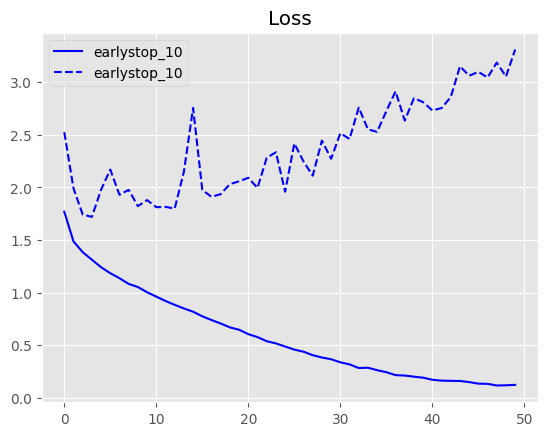

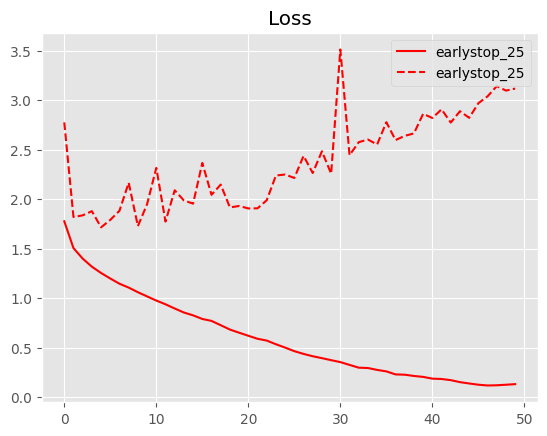

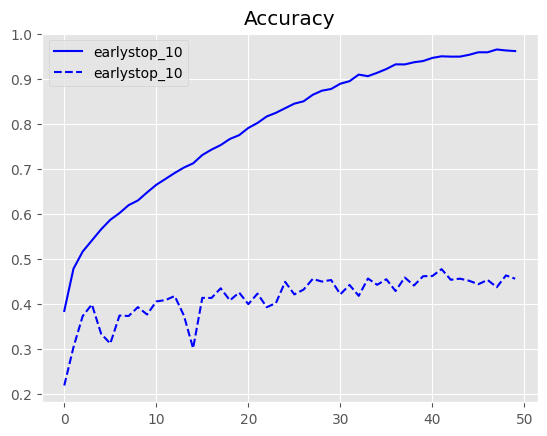

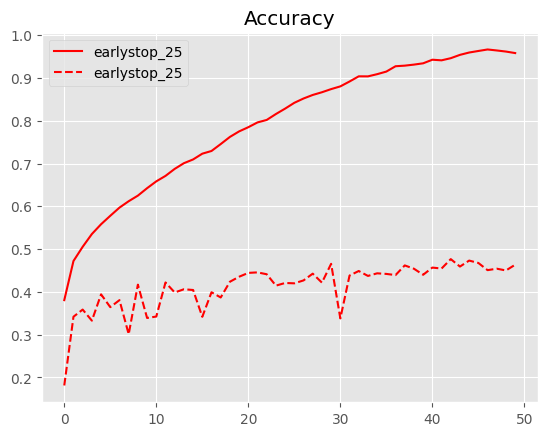

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
col_bar=["b","r"]
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"], "-", label=cond, c=col_bar[i])
    plt.plot(range(len(results[cond]["valid_loss"])), results[cond]["valid_loss"], "--", label=cond, c=col_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"], "-", label=cond, c=col_bar[i])
    plt.plot(range(len(results[cond]["valid_acc"])), results[cond]["valid_acc"], "--", label=cond, c=col_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()
